[ 0.8360188   0.11314284  0.05083836]
[  9.99999998e-01   2.06115362e-09   6.91440009e-13]
[ 0.38842275  0.31801365  0.2935636 ]


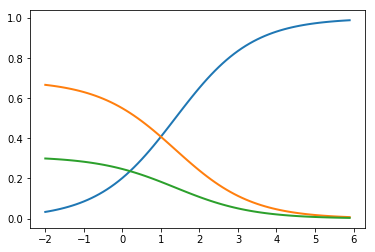

In [9]:
"""softmax"""
#将计算结果转换为概率的形式
import numpy as np
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=0)
scores=[3.0,1.0,0.2]
print(softmax(scores))
print(softmax([ i*10 for i in scores ]))
print(softmax([i/10.0 for i in scores]))
import matplotlib.pyplot as plt
x=np.arange(-2.0,6.0,0.1)
scores=np.vstack([x,np.ones_like(x),0.2*np.ones_like(x)])
plt.plot(x,softmax(scores).T,linewidth=2)
#print(softmax(scores))
plt.show()

### 线性模型中，首先使用$ W^Tx+b $计算，然后将计算结果使用softmax函数转换为概率的形式，接着结合one_hot编码，使用交叉熵进行classify.
### 交叉熵
(1) $ D(S,L)=-\sum_{i}L_ilog(S_i) $ <br>
(2) $ D(S(W^Tx_i+b),L_i) $ <br>
(3) $ Loss=\dfrac{1}{N}\sum_{i}D(S(W^Tx_i+b),L_i) $ <br>
minimize Loss <br>
** 注意：** $ D(S,L)!=D(L,S) $
### 数值计算的稳定性：注意计算值过大或者过小
- 一个很好的指导原则就是：我们总希望我们的变量具有均值为零，同方差的性质！！！
比如针对一张图片的像素点0-255，可以这样变换$ \dfrac{x-128}{128} $

In [12]:
a=1000000000
for i in range(1000000):
    a=a+0.000001
a=a-1000000000
print(a)
#理论结果应该是0.9，但是得到计算的结果是0.95左右？
#很大的数加上很小的数字的时候存在数值计算的稳定性的问题！！！

0.95367431640625


### 多项式拟合实验M=0，1，3，9

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
      9         8        7        6        5         4         3
-398 x + 91.59 x + 2967 x - 5573 x + 3846 x - 925.8 x - 3.703 x
          2
 - 15.04 x + 10.55 x - 1.106e-13


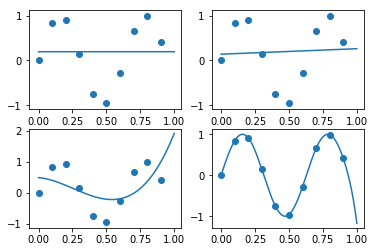

In [43]:
import numpy as np
import matplotlib.pyplot as plt
X=np.arange(0,1,0.1)
test=np.arange(0,1,0.000001)
Y=np.sin(X*10)

plt.subplot(221)
plt.scatter(X,Y)
Z0=np.polyfit(X,Y,0)
P0=np.poly1d(Z0)
plt.plot(test,P0(test))

plt.subplot(222)
plt.scatter(X,Y)
Z1=np.polyfit(X,Y,1)
P1=np.poly1d(Z1)
plt.plot(test,P1(test))

plt.subplot(223)
plt.scatter(X,Y)
Z3=np.polyfit(X,Y,3)
P3=np.poly1d(Z3)
plt.plot(test,P3(test))

plt.subplot(224)
plt.scatter(X,Y)
Z9=np.polyfit(X,Y,9)
P9=np.poly1d(Z9)
plt.plot(test,P9(test))
print(P9)
plt.show()